In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.express as px

In [2]:
url = 'https://www.tsa.gov/coronavirus/passenger-throughput'
req = requests.get(url)

soup = BeautifulSoup(req.content, 'lxml')
table = soup.find_all('table')[0]

In [3]:
df = pd.read_html(str(table))[0]

df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)

display(df)

,2021 Traveler Throughput,2020 Traveler Throughput,2019 Traveler Throughput
Date,,,
2021-07-01,2147090.0,764761,2088760
2021-06-30,1920663.0,626516,2547889
2021-06-29,1808306.0,500054,2347767
2021-06-28,2066964.0,625235,2455536
2021-06-27,2167380.0,633810,2632030
...,...,...,...
2020-07-06,NaN,755555,2748718
2020-07-05,NaN,732123,2795369
2020-07-04,NaN,466669,2345846


In [4]:
df['Difference in Travelers 2021 vs 2020'] = df['2021 Traveler Throughput'].sub(df['2020 Traveler Throughput'])
df['Difference in Travelers 2021 vs 2019'] = df['2021 Traveler Throughput'].sub(df['2019 Traveler Throughput'])
df['Difference in Travelers 2020 vs 2019'] = df['2020 Traveler Throughput'].sub(df['2019 Traveler Throughput'])
df['% Change 2021 vs 2020'] = df['2021 Traveler Throughput'].sub(df['2020 Traveler Throughput']).div(df['2020 Traveler Throughput'])
df['% Change 2021 vs 2019'] = df['2021 Traveler Throughput'].sub(df['2019 Traveler Throughput']).div(df['2019 Traveler Throughput'])
df['% Change 2020 vs 2019'] = df['2020 Traveler Throughput'].sub(df['2019 Traveler Throughput']).div(df['2019 Traveler Throughput'])

display(df)

,2021 Traveler Throughput,2020 Traveler Throughput,2019 Traveler Throughput,Difference in Travelers 2021 vs 2020,Difference in Travelers 2021 vs 2019,Difference in Travelers 2020 vs 2019,% Change 2021 vs 2020,% Change 2021 vs 2019,% Change 2020 vs 2019
Date,,,,,,,,,
2021-07-01,2147090.0,764761,2088760,1382329.0,58330.0,-1323999,1.807531,0.027926,-0.633868
2021-06-30,1920663.0,626516,2547889,1294147.0,-627226.0,-1921373,2.065625,-0.246175,-0.754104
2021-06-29,1808306.0,500054,2347767,1308252.0,-539461.0,-1847713,2.616221,-0.229776,-0.787009
2021-06-28,2066964.0,625235,2455536,1441729.0,-388572.0,-1830301,2.305899,-0.158243,-0.745377
2021-06-27,2167380.0,633810,2632030,1533570.0,-464650.0,-1998220,2.419605,-0.176537,-0.759193
...,...,...,...,...,...,...,...,...,...
2020-07-06,NaN,755555,2748718,NaN,NaN,-1993163,NaN,NaN,-0.725125
2020-07-05,NaN,732123,2795369,NaN,NaN,-2063246,NaN,NaN,-0.738094
2020-07-04,NaN,466669,2345846,NaN,NaN,-1879177,NaN,NaN,-0.801066


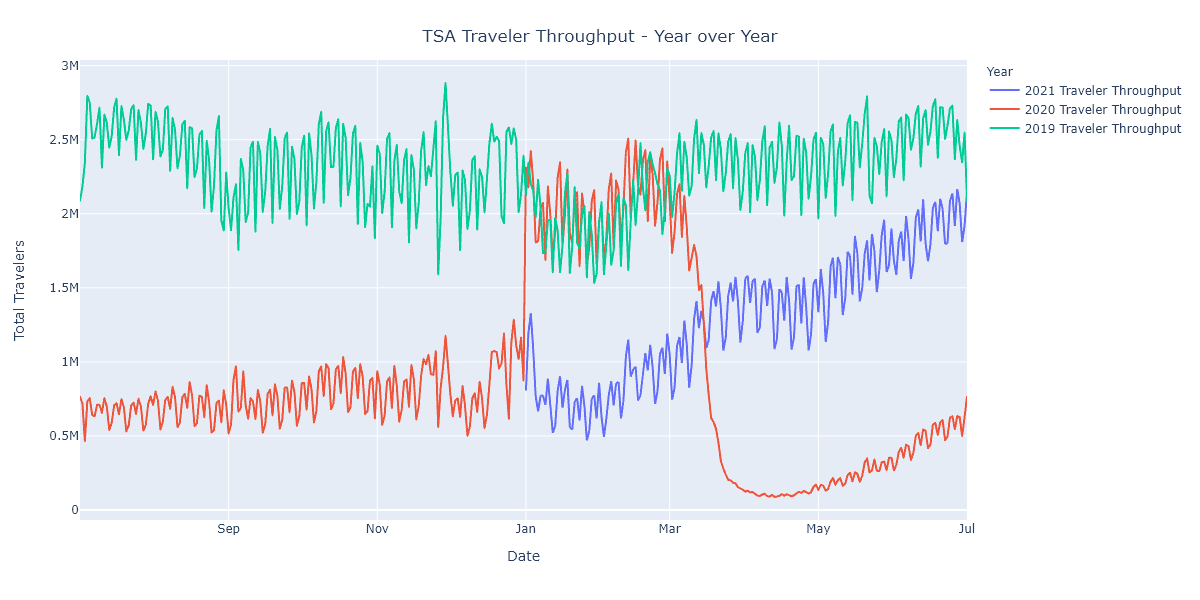

In [5]:
fig = px.line(df, y=['2021 Traveler Throughput',
                     '2020 Traveler Throughput',
                     '2019 Traveler Throughput'],
              labels={'value':'Total Travelers',
                      'variable':'Year'})

fig.update_layout(
    title={'text':'TSA Traveler Throughput - Year over Year',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})

fig.update_xaxes(tickformat='%b\n')

fig.show(renderer='png', height=600, width=1200)